Sunshine Miami: Unveiling Real Estate AI 

In [535]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from math import sqrt

Loading Miami Housing Dataset: https://www.kaggle.com/datasets/deepcontractor/miami-housing-dataset/data?select=miami-housing.csv

In [537]:
df = pd.read_csv('miami-housing.csv')
df.head(5)

,LATITUDE,LONGITUDE,PARCELNO,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality,SALE_PRC
0,25.891031,-80.160561,6.220000e+11,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4,440000.0
1,25.891324,-80.153968,6.220000e+11,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4,349000.0
2,25.891334,-80.153740,6.220000e+11,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4,800000.0
3,25.891765,-80.152657,6.220000e+11,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4,988000.0
4,25.891825,-80.154639,6.220000e+11,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4,755000.0


Preprocessing Data

In [538]:
df.dtypes

LATITUDE             float64
LONGITUDE            float64
PARCELNO             float64
LND_SQFOOT             int64
TOT_LVG_AREA           int64
SPEC_FEAT_VAL          int64
RAIL_DIST            float64
OCEAN_DIST           float64
WATER_DIST           float64
CNTR_DIST            float64
SUBCNTR_DI           float64
HWY_DIST             float64
age                    int64
avno60plus             int64
month_sold             int64
structure_quality      int64
SALE_PRC             float64
dtype: object

In [539]:
df.shape

(13932, 17)

Finding and removing duplicates

In [540]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 17)


In [541]:
df = df.drop_duplicates()
df.head(5)

,LATITUDE,LONGITUDE,PARCELNO,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality,SALE_PRC
0,25.891031,-80.160561,6.220000e+11,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4,440000.0
1,25.891324,-80.153968,6.220000e+11,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4,349000.0
2,25.891334,-80.153740,6.220000e+11,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4,800000.0
3,25.891765,-80.152657,6.220000e+11,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4,988000.0
4,25.891825,-80.154639,6.220000e+11,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4,755000.0


Finding null values

In [542]:
print(df.isnull().sum())

LATITUDE             0
LONGITUDE            0
PARCELNO             0
LND_SQFOOT           0
TOT_LVG_AREA         0
SPEC_FEAT_VAL        0
RAIL_DIST            0
OCEAN_DIST           0
WATER_DIST           0
CNTR_DIST            0
SUBCNTR_DI           0
HWY_DIST             0
age                  0
avno60plus           0
month_sold           0
structure_quality    0
SALE_PRC             0
dtype: int64


In [543]:
df.describe()

,LATITUDE,LONGITUDE,PARCELNO,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality,SALE_PRC
count,13932.000000,13932.000000,1.393200e+04,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,1.393200e+04
mean,25.728811,-80.327475,2.356453e+12,8620.879917,2058.044574,9562.493468,8348.548715,31690.993798,11960.285235,68490.327132,41115.047265,7723.770693,30.669251,0.014930,6.655828,3.513997,3.999419e+05
std,0.140633,0.089199,1.199322e+12,6070.088742,813.538535,13890.967782,6178.027333,17595.079468,11932.992369,32008.474808,22161.825935,6068.936108,21.153068,0.121276,3.301523,1.097444,3.172147e+05
min,25.434333,-80.542172,1.020000e+11,1248.000000,854.000000,0.000000,10.500000,236.100000,0.000000,3825.600000,1462.800000,90.200000,0.000000,0.000000,1.000000,1.000000,7.200000e+04
25%,25.620056,-80.403278,1.080000e+12,5400.000000,1470.000000,810.000000,3299.450000,18079.350000,2675.850000,42823.100000,23996.250000,2998.125000,14.000000,0.000000,4.000000,2.000000,2.350000e+05
50%,25.731810,-80.338911,3.040000e+12,7500.000000,1877.500000,2765.500000,7106.300000,28541.750000,6922.600000,65852.400000,41109.900000,6159.750000,26.000000,0.000000,7.000000,4.000000,3.100000e+05
75%,25.852269,-80.258019,3.060000e+12,9126.250000,2471.000000,12352.250000,12102.600000,44310.650000,19200.000000,89358.325000,53949.375000,10854.200000,46.000000,0.000000,9.000000,4.000000,4.280000e+05
max,25.974382,-80.119746,3.660000e+12,57064.000000,6287.000000,175020.000000,29621.500000,75744.900000,50399.800000,159976.500000,110553.800000,48167.300000,96.000000,1.000000,12.000000,5.000000,2.650000e+06


Visualizing Data

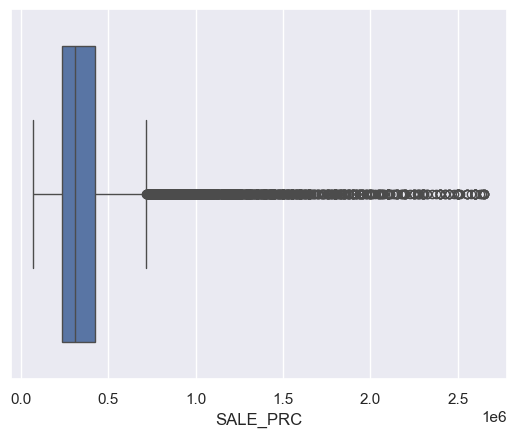

In [544]:
sns.boxplot(x=df['SALE_PRC'])
plt.show()

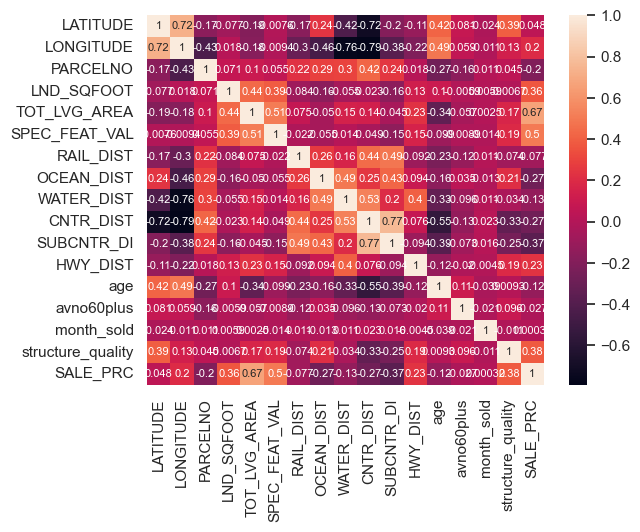

In [545]:
sns.heatmap(df.corr(), annot = True, annot_kws={"size": 8})
plt.show()

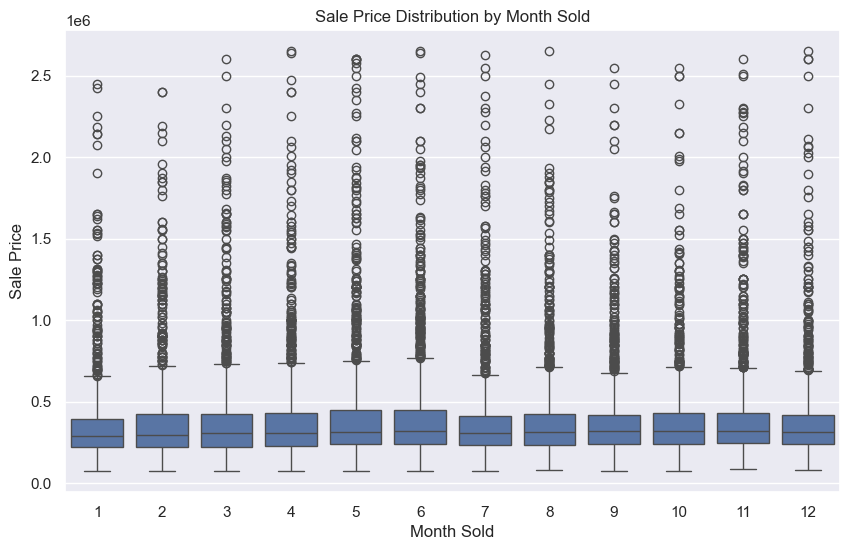

In [546]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['month_sold'], y=df['SALE_PRC'])
plt.title('Sale Price Distribution by Month Sold')
plt.xlabel('Month Sold')
plt.ylabel('Sale Price')
plt.show()

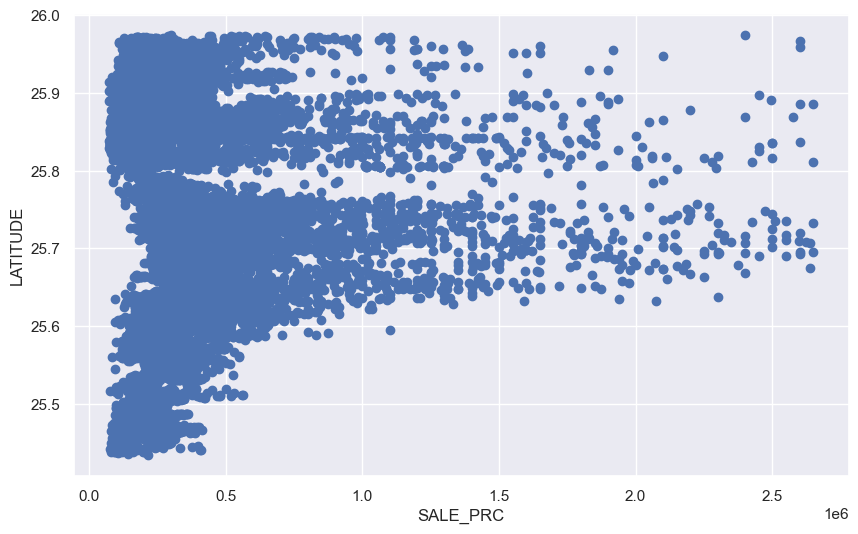

In [547]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df['SALE_PRC'], df['LATITUDE'])
ax.set_xlabel('SALE_PRC')
ax.set_ylabel('LATITUDE')
plt.show()

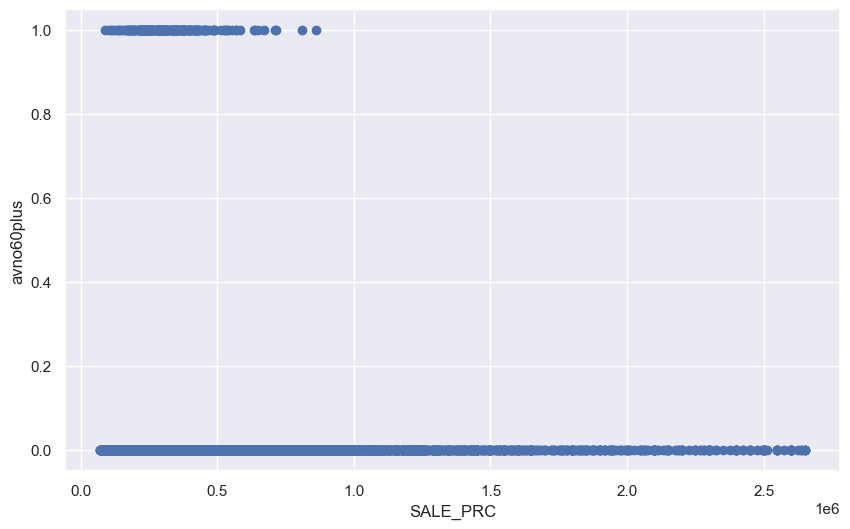

In [548]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df['SALE_PRC'], df['avno60plus'])
ax.set_xlabel('SALE_PRC')
ax.set_ylabel('avno60plus')
plt.show()

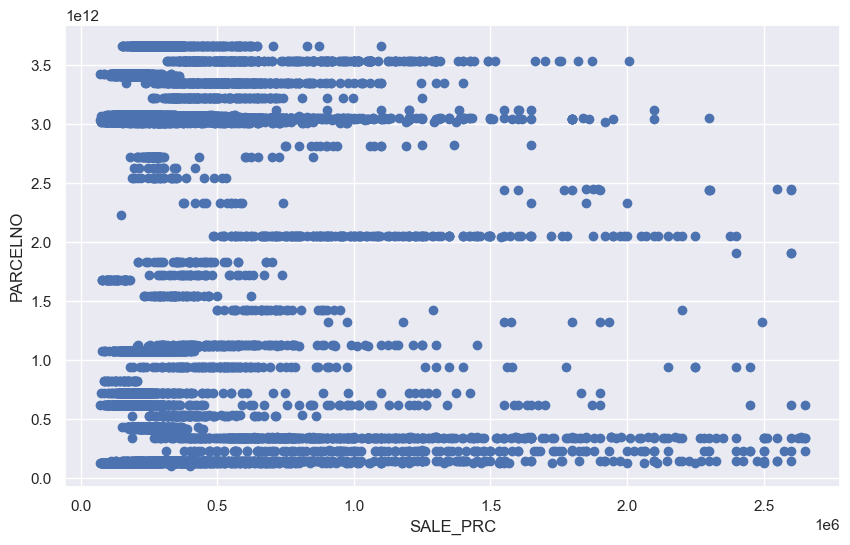

In [549]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df['SALE_PRC'], df['PARCELNO'])
ax.set_xlabel('SALE_PRC')
ax.set_ylabel('PARCELNO')
plt.show()

Dropping unnecessary features

In [550]:
df = df.drop(['PARCELNO', 'avno60plus', 'month_sold', 'LATITUDE'], axis=1)
df.head(5)

,LONGITUDE,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,structure_quality,SALE_PRC
0,-80.160561,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,4,440000.0
1,-80.153968,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,4,349000.0
2,-80.153740,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,4,800000.0
3,-80.152657,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,4,988000.0
4,-80.154639,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,4,755000.0


Extracting target variable

In [551]:
X = df.drop('SALE_PRC', axis=1)
y = df['SALE_PRC']

Splitting the dataset into the Training set and Test set

In [552]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Normalizing Data

In [553]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training and evaluating Linear Regression Model

In [554]:
#Implementing the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [555]:
# Making predictions
y_pred_reg = regressor.predict(X_test)

In [556]:
#Evaluating the Linear Regression model
MSE = mean_squared_error(y_test, y_pred_reg)
RMSE = root_mean_squared_error(y_test, y_pred_reg)
MAE = mean_absolute_error(y_test, y_pred_reg)
R2 = r2_score(y_test, y_pred_reg)

print(f"Linear Regression evaluation metrics: MSE = {MSE:.3f}, RMSE = {RMSE:.3f}, MAE = {MAE:.3f}, R-squared = {R2:.3f}")


Linear Regression evaluation metrics: MSE = 29723488308.235, RMSE = 172405.012, MAE = 112152.208, R-squared = 0.684


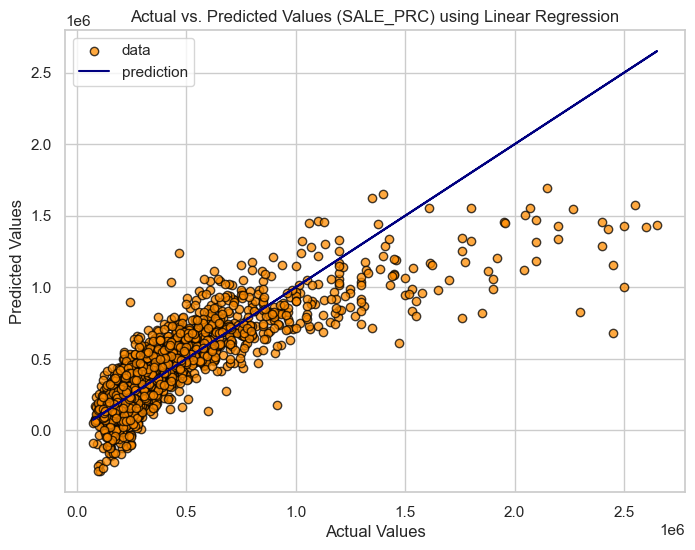

In [557]:
# Plotting Linear Regression predictions
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_reg, alpha=0.75, color='darkorange',label="data", edgecolors='black')
plt.plot(y_test, y_test, color="navy", label="prediction")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs. Predicted Values (SALE_PRC) using Linear Regression')
plt.legend()
plt.show()

Training and evaluating KNeighbors Regressor model

KNeighbors Regressor evaluation metrics: MSE = 10874291401.175, RMSE = 104279.871, MAE = 49320.665, R-squared = 0.885


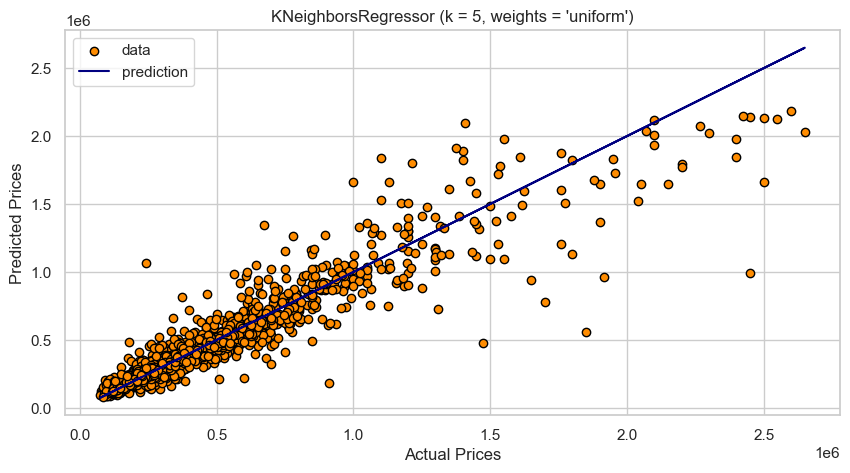

KNeighbors Regressor evaluation metrics: MSE = 10738779313.419, RMSE = 103628.082, MAE = 48426.799, R-squared = 0.886


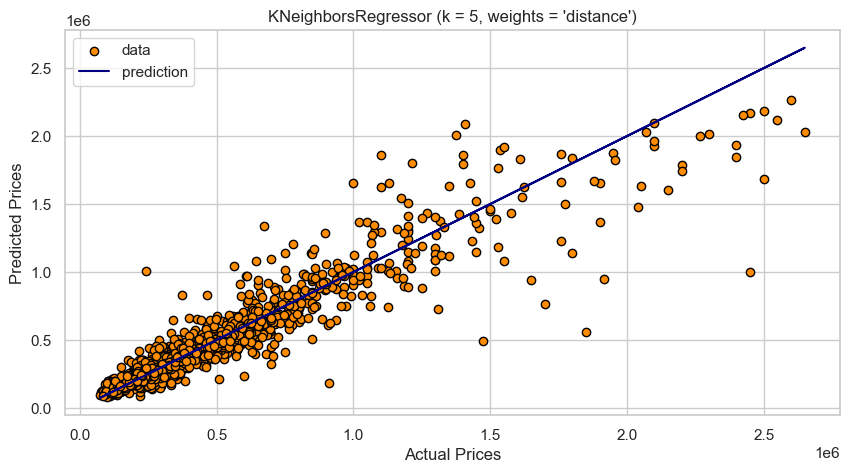

In [559]:
#Implementing the KNeighbors Regressor model
n_neighbors = 5

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights)
    knn.fit(X_train, y_train)

    # Making predictions
    y_pred_knn = knn.predict(X_test)

    # Evaluating the KNeighbors Regressor model
    MSE = mean_squared_error(y_test, y_pred_knn)
    MAE = mean_absolute_error(y_test, y_pred_knn)
    R2 = r2_score(y_test, y_pred_knn)
    RMSE = root_mean_squared_error(y_test, y_pred_knn)

    print(f"KNeighbors Regressor evaluation metrics: MSE = {MSE:.3f}, RMSE = {RMSE:.3f}, MAE = {MAE:.3f}, R-squared = {R2:.3f}")

    # Plotting KNeighbors Regressor predictions
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred_knn, color="darkorange", label="data", edgecolors="black")
    plt.plot(y_test, y_test, color="navy", label="prediction")
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f"KNeighborsRegressor (k = {n_neighbors}, weights = '{weights}')")
    plt.legend()
    plt.show()
    

Training and evaluating the Random Forest model

In [560]:
# Implementing Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [561]:
# Making predictions
y_pred_rf = rf.predict(X_test)

In [562]:
# Evaluating the Random Forest model
MSE = mean_squared_error(y_test, y_pred_rf)
MAE = mean_absolute_error(y_test, y_pred_rf)
R2 = r2_score(y_test, y_pred_rf)
RMSE = root_mean_squared_error(y_test, y_pred_rf)

print(f"Random Forest evaluation metrics: MSE = {MSE:.3f}, RMSE = {RMSE:.3f}, MAE = {MAE:.3f}, R-squared = {R2:.3f}")


Random Forest evaluation metrics: MSE = 8009057307.388, RMSE = 89493.337, MAE = 43685.238, R-squared = 0.915


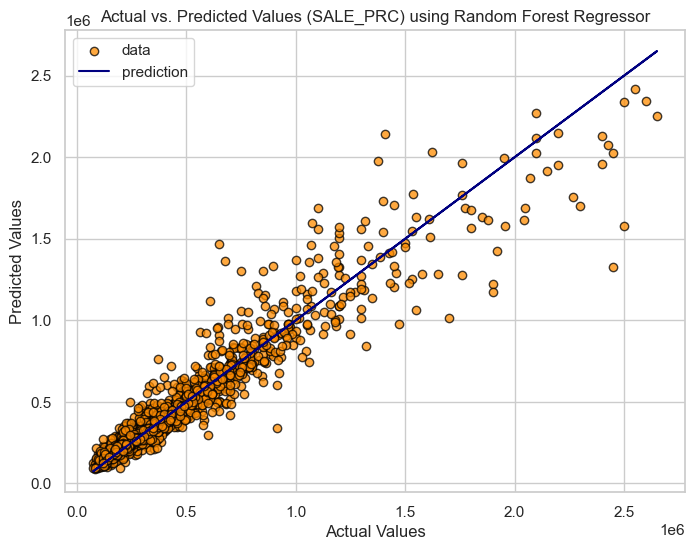

In [563]:
# Plotting Random Forest predictions
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.75, color='darkorange', label="data", edgecolors='black')
plt.plot(y_test, y_test, color="navy", label="prediction")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs. Predicted Values (SALE_PRC) using Random Forest Regressor')
plt.legend()
plt.show()